In [1]:
# ライブラリの読み込み
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csvの読み込み
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# データの確認
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# データフレームの列数と行数を確認
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [6]:
# 列の名前の確認
print(df_train.columns)
print('-'*50)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------------------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# データの概要の確認
print(df_train.info())
print('-'*50)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [8]:
# 欠損値の確認
print(df_train.isnull().sum())
print('-'*50)
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# 要約統計量の表示
df_full = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [10]:
df_full.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


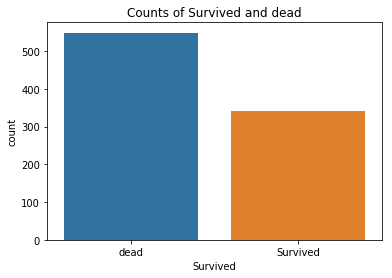

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# 死亡者と生存者の可視化
sns.countplot(x='Survived', data=df_train)
plt.title('Counts of Survived and dead')
plt.xticks([0, 1], ['dead', 'Survived'])
plt.show()

df_train['Survived'].value_counts()

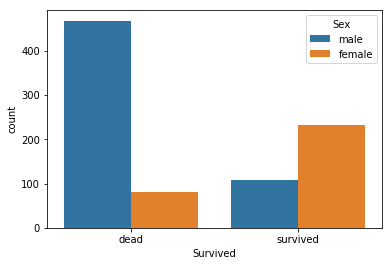

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
# 男女別の死亡者と生存者の数
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.xticks([0.0, 1.0], ['dead', 'survived'])
plt.show()

# 男女別の生存割合
df_train[['Sex', 'Survived']].groupby(['Sex']).mean()

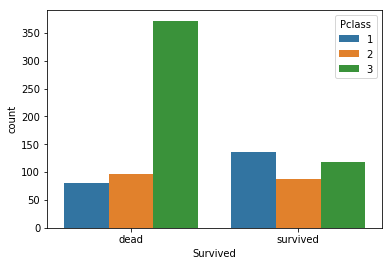

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
# チケット別の死亡者と生存者の数
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.xticks([0.0, 1.0], ['dead', 'survived'])
plt.show()

df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

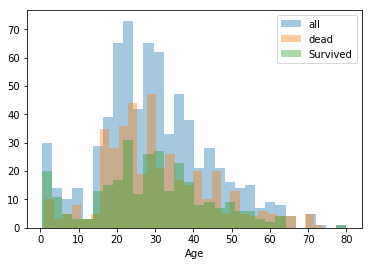

In [17]:
# 年齢の分布
# 全体のヒストグラム
sns.distplot(df_train['Age'].dropna(), kde=False, bins=30, label='all')

# 死亡者のヒストグラム
sns.distplot(df_train[df_train['Survived']==0].Age.dropna(), kde=False, bins=30, label='dead')

# 生存者のヒストグラム
sns.distplot(df_train[df_train['Survived']==1].Age.dropna(), kde=False, bins=30, label='Survived')

plt.legend()
plt.show()

In [19]:
# 年齢を8等分して、CategoricalAgeというカラムを作成
df_train['CategoricalAge'] = pd.cut(df_train['Age'], 8)
df_train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

,CategoricalAge,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.365217
3,"(30.263, 40.21]",0.445161
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


In [ ]:
# 乗船している兄弟・配偶者の数
sns.countplot(x='SibSp', )